### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading

In [2]:
# Load the data
df = pd.read_csv('data/raw/train.csv')
test_df = pd.read_csv('data/raw/test.csv')
gender_submission_df = pd.read_csv('data/raw/gender_submission.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

#### Data Cleaning

In [5]:
# Check missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace = True)

In [7]:
# Drop 'Cabin' due to too many missing values
df.drop(columns = ['Cabin'], inplace = True)

In [8]:
# Fill missing 'Embarked' with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [9]:
# Check and drop duplicates
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Summary Statistics

In [11]:
# Summary statistics for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Distribution of passengers across Pclass
pclass_distribution = df['Pclass'].value_counts(normalize=True) * 100
pclass_distribution

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

#### Group Comparison

In [13]:
# Survival rate by Pclass
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
survival_by_pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [14]:
# Survival rate by Sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()
survival_by_sex


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [15]:
# Create age bins
bins = [0, 18, 35, 60, 100]
labels = ['0-18', '19-35', '36-60', '60+']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Survival rate by Age group
survival_by_age = df.groupby('Age_group')['Survived'].mean()
survival_by_age


Age_group
0-18     0.503597
19-35    0.353271
36-60    0.400000
60+      0.227273
Name: Survived, dtype: float64

#### Data Visualization

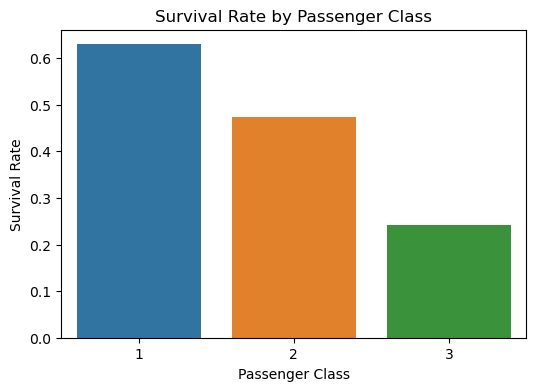

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by Passenger Class
plt.figure(figsize = (6,4))
sns.barplot(x = 'Pclass', y = 'Survived', data = df, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Save the plot
plt.savefig('survival_rate_by_pclass.png')

# Display the plot
plt.show()


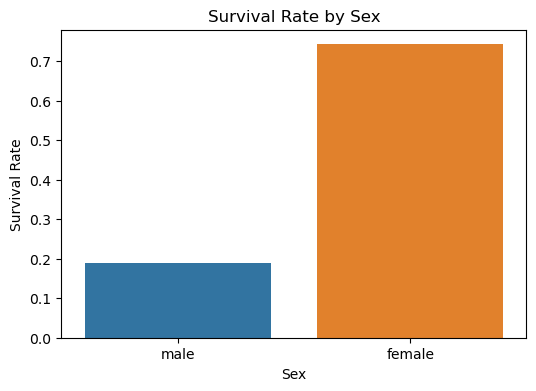

In [17]:
# Survival rate by Sex
plt.figure(figsize = (6,4))
sns.barplot(x = 'Sex', y = 'Survived', data = df, errorbar=None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# Save the plot
plt.savefig('survival_rate_by_sex.png')

# Display the plot
plt.show()

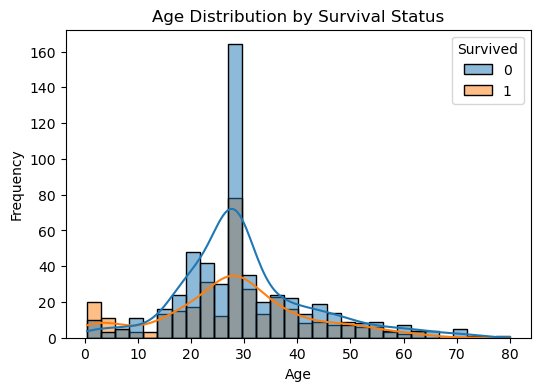

In [18]:
# Age Distribution by Survival Status
plt.figure(figsize = (6,4))
sns.histplot(data = df, x = 'Age', hue= 'Survived', kde = True, bins = 30)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Save the plot
plt.savefig('age_distribution_by_survival_status.png')

# Display the plot
plt.show()


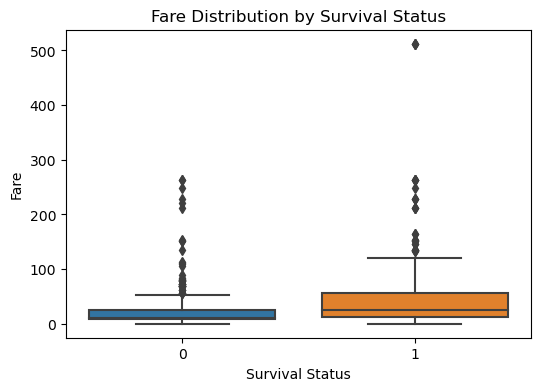

In [19]:
# Box Plot for Fare by Survival Status
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Survived', y = 'Fare', data = df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Fare')

# Save the plot
plt.savefig('fare_distribution_by_survival_status.png')

# Display the plot
plt.show()
